# 1- Import libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

------------
# 2- Import data and show the first 5 rows.

In [2]:
data = pd.read_csv('D://Bank Customer Churn Prediction/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


----------------
# 3- Check the last 5 rows.

In [88]:
data.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1
9999,792,28,4,130142.79,1,1,0,38190.78,0,0,0,0


-----------
# 4- Find the shape of our dataset.

In [4]:
data.shape
print('Number of rows = ',data.shape[0])
print('Number of columns = ',data.shape[1])

Number of rows =  10000
Number of columns =  14


--------
# 5- Get informations about our dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


------------
# 6- Check the null values.

In [6]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

###### - We don't have null values in our dataset.

--------
# 7- Get overall statistics of our dataset.

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


------------
# 8- dropping irrelevant features.

In [8]:
data = data.drop(['CustomerId','RowNumber','Surname'],axis=1)

-----------
# 9- Check duplicated data.

In [9]:
data.duplicated().any()

False

###### - We don't have any duplicates in our data.

----------
# 10- Encoding categorical data.

In [11]:
data = pd.get_dummies(data,drop_first=True) 

----------
# 11- Show the Exited values in count plot.

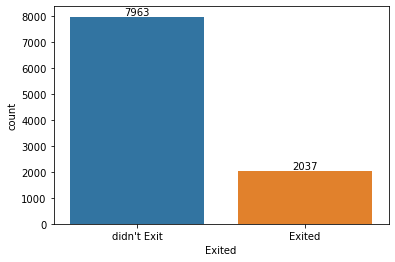

In [12]:
ax = sns.countplot(x='Exited',data=data)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks([0,1],["didn't Exit",'Exited'])

plt.show()

------------
# 12- Split data into X and y.

In [13]:
X = data.drop(['Exited'],axis=1)
y = data['Exited']

------------
# 13- Split data into train and test .

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

---------------
# 14- Feature scaling.

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train )
X_test = sc.transform(X_test)

---------------------
# 15- Logistic Regression.

In [17]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred_log = log.predict(X_test)

-----------
# 16- Check our model accuracy.

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_log)

0.811

In [19]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [20]:
precision_score(y_test,y_pred_log)

0.5524475524475524

In [21]:
recall_score(y_test,y_pred_log)

0.2010178117048346

In [22]:
f1_score(y_test,y_pred_log)

0.2947761194029851

##### - Now we see the accuracy of our model is very bad because our data is imbalanced.
##### - We will go back and handle it in a cell 13.

# 17- Handling imbalanced data with SMOTE.

In [23]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)

------------
# 18- Split  balaced data into train and test .

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

---------------
# 19- Feature scaling.

In [25]:
X_train = sc.fit_transform(X_train )
X_test = sc.transform(X_test)

---------------------
# 20- New Logistic Regression.

In [26]:
log.fit(X_train,y_train)
y_pred_log = log.predict(X_test)

-----------
# 21- Check new model accuracy.

In [27]:
accuracy_score(y_test,y_pred_log)

0.7865662272441933

In [28]:
precision_score(y_test,y_pred_log)

0.7740112994350282

In [29]:
recall_score(y_test,y_pred_log)

0.793947198969736

In [30]:
f1_score(y_test,y_pred_log)

0.7838525111252385

###### - Now our model is work perfect and we will find the best model.

----------
# 22- SVC.

In [31]:
from sklearn import svm

In [32]:
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred_svm)

0.8370998116760828

In [34]:
precision_score(y_test,y_pred_svm)

0.8322622107969152

----------
# 23- Kneighbours calssifier.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
y_pred_KN = KN.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred_KN)

0.8267419962335216

In [38]:
precision_score(y_test,y_pred_KN)

0.8106765983860956

-----
# 24- Decision Tree Classifier.

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred_DT)

0.785624607658506

In [42]:
precision_score(y_test,y_pred_DT)

0.771875

---------
# 25- Random Forest Classifier.

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred_RF)

0.8587570621468926

In [46]:
precision_score(y_test,y_pred_RF)

0.8555770470664088

-------
# 26- Gradient Boosting Classifier.

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
GB = GradientBoostingClassifier()
GB.fit(X_train,y_train)
y_pred_GB = GB.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred_GB)

0.8389830508474576

In [50]:
precision_score(y_test,y_pred_GB)

0.8337612323491655

-----------
# 27- Make data frame of our models to choose the best of them.

In [51]:
final_data = pd.DataFrame({'Models':['log','svm','KN','DT','RF','GB'],
                          'Accuracy':[accuracy_score(y_test,y_pred_log),
                                     accuracy_score(y_test,y_pred_svm),
                                     accuracy_score(y_test,y_pred_KN),
                                     accuracy_score(y_test,y_pred_DT),
                                     accuracy_score(y_test,y_pred_RF),
                                     accuracy_score(y_test,y_pred_GB)]},)

In [52]:
final_data

,Models,Accuracy
0,log,0.786566
1,svm,0.837100
2,KN,0.826742
3,DT,0.785625
4,RF,0.858757
5,GB,0.838983


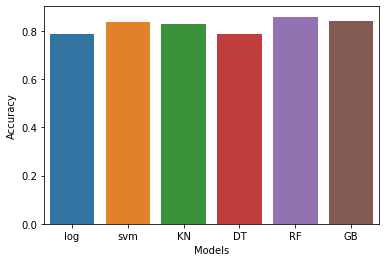

In [53]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])
plt.show()

###### - The best model is Random Forest Classifier.

--------
# 28- Build the final model.

In [54]:
X_res = sc.fit_transform(X_res)

In [55]:
RF.fit(X_res,y_res)

RandomForestClassifier()

---------
# 29- Save our model with joblib.

In [56]:
import joblib

In [57]:
joblib.dump(RF,'churn_predict_model')

['churn_predict_model']

In [58]:
model = joblib.load('churn_predict_model')

---------
# 30- Test model with a new data.

In [60]:
model.predict([[619,42,2,0.0,0,0,0,101384.88,0,0,0]])

array([1], dtype=int64)

 -----------
 # 31- GUI.

In [61]:
from tkinter import *

In [68]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [108]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = float(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = float(e8.get())
    p9 = int(e9.get())
    if p9 == 1:
        Geography_Germany = 1
        Geography_Spain = 0
        Geography_France = 0
    elif p9 == 2:
        Geography_Germany = 0
        Geography_Spain = 1
        Geography_France = 0
    else:
        Geography_Germany = 0
        Geography_Spain = 0
        Geography_France = 1        
    p10 = int(e10.get())
    model = joblib.load('churn_predict_model')
    result = model.predict(sc.transform([[p1,p2,p3,p4,p5,p6,p7,p8,Geography_Germany,Geography_Spain,p10]]))
    if result[0] == 1:
        Label(master,text='Customer Exited').grid(row=12)
    else:
        Label(master,text="Customer didn't Exit").grid(row=12)
        


master = Tk()
master.title('Bank customer churn prediction')
label = Label(master,text='Bank customer churn prediction',bg='black',fg='white').grid(row=0,columnspan=2)
Label(master,text='Enter your CreditScore').grid(row=1)
Label(master,text='Enter your Age [18:100]').grid(row=2)
Label(master,text='Enter your Tenure [0:10]').grid(row=3)
Label(master,text='Enter your Balance').grid(row=4)
Label(master,text='Number Of Products [1/2/3/4]').grid(row=5)
Label(master,text='HasCrCard or NotHasCrCard [1/0]').grid(row=6)
Label(master,text='Active or NotActive [1/0]').grid(row=7)
Label(master,text='Enter your EstimatedSalary').grid(row=8)
Label(master,text='Germany or Spain or France [1/2/3]').grid(row=9)
Label(master,text='Male or Female [1/0]').grid(row=10)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)


Button(master,text="Predict",bg="blue",fg="yellow",command=show_entry_fields).grid()
mainloop()

C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
